In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### Data

In [2]:
# make the data more readable and index the col 0
df_in = pd.read_csv("/content/Consumer_Airfare_Report__Table_3_-_City-Pair_Markets_With_A_Substantial_Increase_In_Average_Fare_20250421.csv",index_col = 0)
df_de = pd.read_csv("/content/Consumer_Airfare_Report__Table_4_-_City-Pair_Markets_With_A_Substantial_Decrease_In_Average_Fare_20250421.csv",index_col = 0)
data = pd.concat([df_in, df_de], axis=0)
data

FileNotFoundError: [Errno 2] No such file or directory: '/content/Consumer_Airfare_Report__Table_3_-_City-Pair_Markets_With_A_Substantial_Increase_In_Average_Fare_20250421.csv'

In [ ]:
data.shape

(6262, 16)

In [ ]:
data.shape

(6262, 16)

In [ ]:
data.describe()

,Year,quarter,citymarketid_1,citymarketid_2,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
count,6262.000000,6262.000000,6262.000000,6262.000000,6.262000e+03,6262.000000,6262.000000,6.262000e+03,6262.000000,6262.000000,6.262000e+03,6262.000000
mean,2012.562440,2.492494,31453.513255,32279.053976,6.620395e+04,195.294796,204.582831,6.134636e+04,-9.288082,-0.000098,4.857593e+03,1.509336
std,9.272594,1.097481,1230.382771,1443.056640,9.622115e+04,63.077696,67.143424,9.246733e+04,74.525828,3.239455,3.918439e+04,18.037984
min,1996.000000,1.000000,30135.000000,30158.000000,2.530000e+03,56.430000,61.980000,2.000000e+01,-341.080000,-55.866800,-7.758200e+05,-44.524500
25%,2005.000000,2.000000,30423.000000,30928.000000,2.155250e+04,149.560000,153.550000,1.870250e+04,-72.437500,-0.318000,-6.497500e+03,-0.133975
50%,2016.000000,3.000000,30994.000000,31995.000000,3.582500e+04,188.910000,197.270000,3.317500e+04,7.660000,0.057950,2.830000e+03,0.073500
75%,2021.000000,3.000000,32211.000000,33495.000000,7.019500e+04,233.487500,245.382500,6.655000e+04,49.362500,0.325575,1.337750e+04,0.529725
max,2024.000000,4.000000,35412.000000,35628.000000,1.604490e+06,565.680000,473.210000,1.592880e+06,251.130000,60.008600,1.209450e+06,864.000000


### Data Cleaning

In [ ]:
#delete the colunms, quarter, citymarketid_1, citymarketid_2, Geocoded_City1, Geocoded_City2
data_clean = data.drop(['citymarketid_1', 'citymarketid_2', 'Geocoded_City1', 'Geocoded_City2'], axis=1, inplace=False)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6262 entries, Table 3 to Table 4
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                6262 non-null   int64  
 1   quarter             6262 non-null   int64  
 2   city1               6262 non-null   object 
 3   city2               6262 non-null   object 
 4   cur_passengers      6262 non-null   int64  
 5   cur_fare            6262 non-null   float64
 6   ly_fare             6262 non-null   float64
 7   ly_passengers       6262 non-null   int64  
 8   amount_change       6262 non-null   float64
 9   percent_change      6262 non-null   float64
 10  amount_change_pax   6262 non-null   int64  
 11  percent_change_pax  6262 non-null   float64
dtypes: float64(5), int64(5), object(2)
memory usage: 636.0+ KB


In [ ]:
#join 'city1' and 'city2' columns into a new column 'route'
data_clean['route'] = data_clean['city1'].astype(str) + ' - ' + data_clean['city2'].astype(str)

# Reorder the columns
cols = list(data_clean.columns)
cols.insert(1, cols.pop(cols.index('route')))  # Move 'city_pair' to the second position
data_clean = data_clean[cols]

# Delete the 'city1' and 'city2' columns
data_clean = data_clean.drop(['city1', 'city2'], axis=1)


# Display the updated DataFrame
data_clean.head()


,Year,route,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax
tbl,,,,,,,,,,,
Table 3,2024,"Colorado Springs, CO - Phoenix, AZ",4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233
Table 3,2024,"Colorado Springs, CO - Las Vegas, NV",4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417
Table 3,2024,"Colorado Springs, CO - Los Angeles, CA (Metrop...",4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209
Table 3,2024,"Denver, CO - Jacksonville, FL",4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705
Table 3,2024,"Atlanta, GA (Metropolitan Area) - Cleveland, O...",4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402


In [ ]:
# hot encode route and join it the the main df with binay feture. to predict popular destination
city_pairs = pd.get_dummies(data_clean['route'],prefix= "route")
data_clean = pd.concat([data_clean, city_pairs], axis=1)
data_clean  = data_clean.drop(['route'], axis=1)
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Tallahassee, FL - Tampa, FL (Metropolitan Area)","route_Tallahassee, FL - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Trenton, NJ - West Palm Beach/Palm Beach, FL","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Valparaiso, FL - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Washington, DC (Metropolitan Area) - Wichita, KS"
tbl,,,,,,,,,,,,,,,,,,,,,
Table 3,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
#find the dtype of Colorado Springs, CO - Phoenix, AZ
data_clean['route_Tallahassee, FL - Tampa, FL (Metropolitan Area)'].dtype


dtype('bool')

In [ ]:
# removed extream outliers 1
df_trimmed = data_clean[(data_clean['cur_fare'] > data_clean['cur_fare'].quantile(0.01)) &
                (data_clean['cur_fare'] < data_clean['cur_fare'].quantile(0.99))]
# removed extream outliers 2
df1_trimmed = data_clean[(data_clean['cur_passengers'] > data_clean['cur_passengers'].quantile(0.01)) &
                (data_clean['cur_passengers'] < data_clean['cur_passengers'].quantile(0.99))]

# model: predict fare

In [ ]:
data_clean.head()

,Year,quarter,cur_passengers,cur_fare,ly_fare,ly_passengers,amount_change,percent_change,amount_change_pax,percent_change_pax,...,"route_Tallahassee, FL - Tampa, FL (Metropolitan Area)","route_Tallahassee, FL - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - Toledo, OH","route_Tampa, FL (Metropolitan Area) - Washington, DC (Metropolitan Area)","route_Tampa, FL (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Trenton, NJ - West Palm Beach/Palm Beach, FL","route_Tulsa, OK - Washington, DC (Metropolitan Area)","route_Valparaiso, FL - Washington, DC (Metropolitan Area)","route_Washington, DC (Metropolitan Area) - West Palm Beach/Palm Beach, FL","route_Washington, DC (Metropolitan Area) - Wichita, KS"
tbl,,,,,,,,,,,,,,,,,,,,,
Table 3,2024,4,34490,205.96,169.88,39340,36.08,0.2124,-4850,-0.1233,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,29550,197.70,156.70,34430,41.00,0.2617,-4880,-0.1417,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,24910,256.22,192.41,36680,63.81,0.3316,-11770,-0.3209,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,40090,315.81,257.61,43130,58.19,0.2259,-3040,-0.0705,...,False,False,False,False,False,False,False,False,False,False
Table 3,2024,4,82790,211.52,164.20,79590,47.32,0.2882,3200,0.0402,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
price_pred_X = df_trimmed[['Year', 'quarter', 'ly_fare', 'ly_passengers', 'cur_passengers',
            'amount_change_pax', 'percent_change_pax']]
price_pred_y = np.log(df_trimmed['cur_fare']) # to fix skewness

In [ ]:
price_pred_X_train, price_pred_X_test, price_pred_y_train, price_pred_y_test = train_test_split(price_pred_X, price_pred_y, test_size=0.2, random_state=42)

In [ ]:
# Train the model
lm = LinearRegression()
lm.fit(price_pred_X_train, price_pred_y_train)
predictions = lm.predict(price_pred_X_test)

In [ ]:
cdf = pd.DataFrame(lm.coef_, price_pred_X.columns, columns=['Coeff'])
print(cdf)

                           Coeff
Year                9.742320e-03
quarter             2.326385e-03
ly_fare             1.317471e-03
ly_passengers       4.578248e-07
cur_passengers     -3.516982e-07
amount_change_pax  -8.095230e-07
percent_change_pax -1.620155e-03


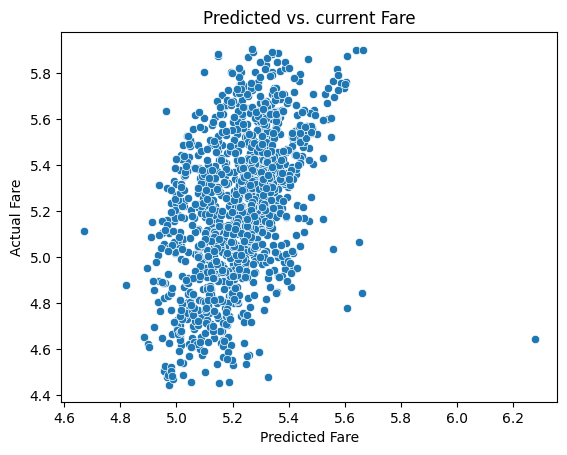

In [ ]:
sns.scatterplot(x = predictions, y = price_pred_y_test)
plt.xlabel('Predicted Fare')
plt.ylabel('Actual Fare')
plt.title('Predicted vs. current Fare')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math

In [ ]:
print('MAE:', mean_absolute_error(price_pred_y_test, predictions))
print('MSE:', mean_squared_error(price_pred_y_test, predictions))
print('RMSE:', math.sqrt(mean_squared_error(price_pred_y_test, predictions)))
print('R2:', r2_score(price_pred_y_test, predictions))


MAE: 0.22575274730823397
MSE: 0.07821190322896947
RMSE: 0.2796639112023027
R2: 0.21451750459135632


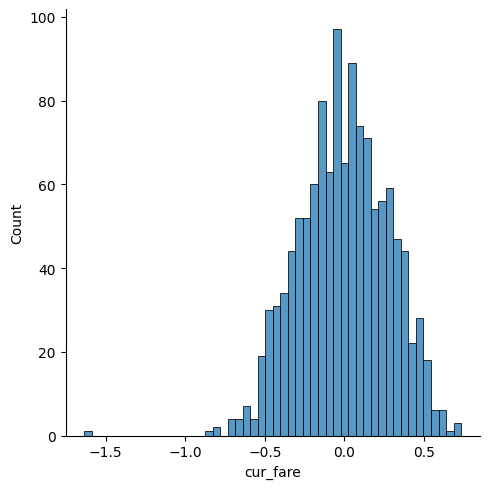

In [ ]:
# residuals
price_residuals = price_pred_y_test - predictions
sns.displot(price_residuals, bins=50, kde=False)

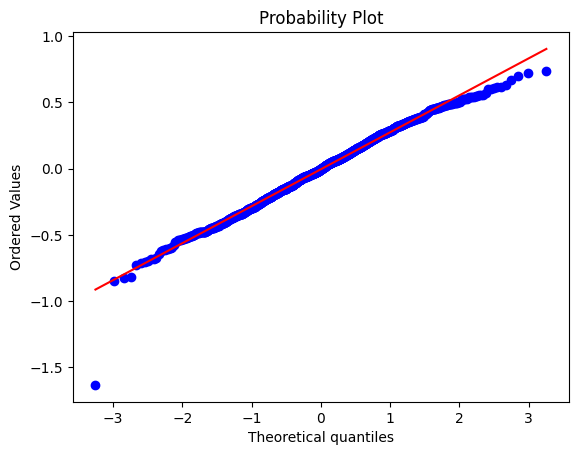

In [ ]:
import scipy.stats as stats
stats.probplot(price_residuals, dist="norm", plot=plt)
plt.show()